# Assignment 3 Info


## Class Notes
- Use BeautifulSoup (4) for html scraping
  - https://realpython.com/python-web-scraping-practical-introduction/
  - https://realpython.com/beautiful-soup-web-scraper-python/#step-1-inspect-your-data-source
  - `.prettify()` can be useful to look at the source code
- To join absolute and reltative pages: use module `urlparse`
  - `urlparse.urljoin(url1, url2)`
- To actually *get* the page, you should use the module `requests`
  - `page = requests.get(URL)`
  - `soup = BeautifulSoup(page.content , "html.parser"`
- Process:
  - How ma

## Summary
- **Deadline**: 1st April 2022 18:00


## Group 14
- Antonio Sanchez Martin - ''5245834''
- Felix Unger - ''5673631''
- Jeroen van Paassen - ''4720970''
- Yunus Emre Torlak - ''5597668''

## Planning:

1. Put the code in visual studio and visualize the basic dataset
2. Figure out how to use the dataset to do the plots
3. Make the plots (draw conslusions?)
4. How do we use the plots to answer the questions?
5. Structure the report, divide the questions and explain relevant plots

# Data Scraping
- Row -> Article entry on the website
- Columns -> 
  - Name
  - Date
  - Time
- Idea: Use `datetime` for storing the date data in a flexible format.

In [2]:
website = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'

In [3]:
import requests
import bs4 as bs

get_soup = lambda link: bs.BeautifulSoup(requests.get(link).content)
soup = get_soup(website)
print(soup.prettify())

<html>
 <head>
  <title>
   Articles
  </title>
 </head>
 <body>
  <h1>
   All articles
  </h1>
  <br/>
  <br/>
  <h2>
   Articles year 2012
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2012.html">
    Articles in 2012
   </a>
  </div>
  <h2>
   Articles year 2013
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2013.html">
    Articles in 2013
   </a>
  </div>
  <h2>
   Articles year 2014
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2014.html">
    Articles in 2014
   </a>
  </div>
  <h2>
   Articles year 2015
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2015.html">
    Articles in 2015
   </a>
  </div>
  <h2>
   Articles year 2016
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2016.html">
    Articles in 2016
   </a>
  </div>
  <h2>
   Articles year 2017
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2017.html">
    Articles in 2017
   </a>
  </div>
  <h2>
   Articles year 2018
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./

In [4]:
# Get all links on site
# Checked: Works as expected
from urllib.parse import urljoin

def get_links(to_scrape = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'):
    soup = get_soup(to_scrape)
    links = soup.find_all('a', href=True)
    if links is False:
        return [] # remember that empty arrays are "false" in python
    links = [urljoin(to_scrape, link['href']) for link in links]
    return links

print(get_links(to_scrape=website))

['https://jdestefani.github.io/SEN163A-TabularRazorArchives/2012.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2013.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2014.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2015.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2016.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2017.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2018.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2019.html']


In [5]:
# Start getting url
# %%script false --no-raise-error
import pandas as pd
import threading
import concurrent.futures

class Scraper:
    def __init__(self, website:str):
        self.scraped_data = list() # create a list to append all website inforation
        self._lock = threading.Lock()
        self.scrape(website)
        fields = ['link','author', 'date', 'time'] # columns of table
        self.scraped_data= pd.DataFrame(self.scraped_data, columns = fields) # export as a dataframe

    def scrape(self, website, domain = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'): 
        all_links = get_links(website)
        if all_links:
            # Keep on searching
            with concurrent.futures.ThreadPoolExecutor() as executor:
                for link in all_links:
                    if link in domain:
                        continue
                    print(f"Scraping: {link}\n")
                    executor.submit(self.scrape, link)
        else:
            # Get the data (i.e. base case)
            soup = get_soup(website) # get the soup object for extracting info
            web_info= list()
            web_info.append(website)
            web_info.append(soup.find_all('div', class_='author')[0].text)
            web_info.append(soup.find_all('div', class_='date')[0].text)
            web_info.append(soup.find_all('div', class_='time')[0].text)
            with self._lock:
                self.scraped_data.append(web_info) # append to object list
            
# output = Scraper(website)
output = Scraper(website).scraped_data

# Save the data so that it does not have to be scraped every time
output.to_csv('scraped_data.csv', index=False)


Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2012.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2013.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2014.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2015.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2016.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2017.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2018.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2019.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2012-1.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2012-2.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2012-3.html

Scraping: https://jdestefani.github.io/SEN163A-TabularRazorArchives/2012-4.html

Scraping: https://jdestefani.github.io/SEN16

In [ ]:
# Load the scraped web data
import pandas as pd
web_data = pd.read_csv('2012.csv')
web_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39126 entries, 0 to 39125
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   link    39126 non-null  object
 1   author  39126 non-null  object
 2   date    39126 non-null  object
 3   time    39126 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


## Notes
Some important things that we need to take into account when using the dataset:
- there could be people with the exact same name
- an absence of over 16 weeks could be considered as pregnancy (6 for pregnancy and 10 after giving birth)
- for men that is at minimum 1 week (->can we link ''holidays'' to pregnancy of the partner?)

## Answering the questions
-  Questions:
    1. Are there are couples among the employees. If so, who? Are they still together?
       1. Look if they go on holidays together
         - For this we look at the covariance by plotting the productivity of employees sharing the same name over time
       2. Look at shared surnames
         - For this we plot a table with the surnames and how many times they occur over all authors
       3. Look if they changed surnames
    2. Did any of the employees have a child? If so, who?
       1. 9+ month "break", an absence of 16 weeks
         - We plot a histogram with the amount of days (x-axis) since last posted and amount of authors (y-axis)
       2. If the mother leaves for 9+ months, then the father might also take a leave (at minimum 1 week)
       3. They might decrease how much they work (frequency of publish)
    3. If you would be looking to work for Tabularazor Inc., how many holidays can you expect to get per year?
       1. Look at all periods that are larger than "working but not publishing", but shorter than "we're having a baby"
          - We plot the productivity of random employees to see the average productivity over time

# Plots
First, we plot some diagrams to visualize the dataset that we have. The plots that we will make are:
- [X] histogram with number of employees on y-axis and amount of work posted on the x-axis (to see frequency of work posted/ distribution of productivity)
- [ ] a plot with the productivity of a random employee over time
- [X] table with surnames and the amount of authors with that surname
- [ ] the productivity of employees sharing the same surname over time? (covariance)
- [ ] scatterplot with years on x-axis and time on y-axis, to see the behaviour of posting articles over time

### Scatterplot
Axis Formatting:
-y-axis Timestamp with 0-24 h 
-x-axis date from 2012 to 2020
-different colors each employee

Analysis: 
-changes in publishing time and frequency? 
-correlation to children or marriage? 




### Employee Histog

Axis Formatting: histogram with number of employees on x-axis and amount of work posted on the y-axis (to see frequency of work posted), 
note: if productivity is double the average, it could be the case that there are 2 employees with the exact same name

    

## Data expansion:


In [ ]:
# print(web_data.iloc[0]['date'].date()) # the type of the time

### Convert to datetime format
- Why?-> Because that way we can 

In [ ]:
web_data['datetime'] = web_data['time'] + " " +  web_data['date']
web_data['datetime'] = pd.to_datetime(web_data['datetime'])
web_data.sort_values(by=['datetime'], inplace=True, ignore_index=True)
web_data.head()

,link,author,date,time,datetime
0,https://jdestefani.github.io/SEN163A-TabularRa...,Leandro Marse,2012-01-01,10:52,2012-01-01 10:52:00
1,https://jdestefani.github.io/SEN163A-TabularRa...,Jaye Shimek,2012-01-01,15:17,2012-01-01 15:17:00
2,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:01,2012-01-02 09:01:00
3,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:02,2012-01-02 09:02:00
4,https://jdestefani.github.io/SEN163A-TabularRa...,Andreas Jost,2012-01-02,09:06,2012-01-02 09:06:00


### Name and Surname division
- Why? -> For instance, to check a change of name

In [ ]:
# new data frame with split value columns
temp = web_data["author"].str.split(" ", n = 1, expand = True)
# making separate first name column from new data frame
web_data["Name"]= temp[0]
# making separate last name column from new data frame
web_data["Surname"]= temp[1]
web_data.head()

,link,author,date,time,datetime,Name,Surname
0,https://jdestefani.github.io/SEN163A-TabularRa...,Leandro Marse,2012-01-01,10:52,2012-01-01 10:52:00,Leandro,Marse
1,https://jdestefani.github.io/SEN163A-TabularRa...,Jaye Shimek,2012-01-01,15:17,2012-01-01 15:17:00,Jaye,Shimek
2,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:01,2012-01-02 09:01:00,Marthe,Hale
3,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:02,2012-01-02 09:02:00,Marthe,Hale
4,https://jdestefani.github.io/SEN163A-TabularRa...,Andreas Jost,2012-01-02,09:06,2012-01-02 09:06:00,Andreas,Jost



### Days since last publication
- Why? -> It will help with detecting holidays and when people took them.

In [ ]:
import datetime as dt

web_data['time_since_pub'] = web_data.groupby(['author'])['datetime'].diff()
web_data['time_since_pub'].fillna(pd.Timedelta(seconds=0), inplace=True)
print(web_data.loc[3, 'time_since_pub'])
web_data.head(20)

0 days 00:01:00


,link,author,date,time,datetime,Name,Surname,time_since_pub
0,https://jdestefani.github.io/SEN163A-TabularRa...,Leandro Marse,2012-01-01,10:52,2012-01-01 10:52:00,Leandro,Marse,0 days 00:00:00
1,https://jdestefani.github.io/SEN163A-TabularRa...,Jaye Shimek,2012-01-01,15:17,2012-01-01 15:17:00,Jaye,Shimek,0 days 00:00:00
2,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:01,2012-01-02 09:01:00,Marthe,Hale,0 days 00:00:00
3,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:02,2012-01-02 09:02:00,Marthe,Hale,0 days 00:01:00
4,https://jdestefani.github.io/SEN163A-TabularRa...,Andreas Jost,2012-01-02,09:06,2012-01-02 09:06:00,Andreas,Jost,0 days 00:00:00
5,https://jdestefani.github.io/SEN163A-TabularRa...,Anisha Mathes,2012-01-02,09:09,2012-01-02 09:09:00,Anisha,Mathes,0 days 00:00:00
6,https://jdestefani.github.io/SEN163A-TabularRa...,Remedios Fincham,2012-01-02,09:13,2012-01-02 09:13:00,Remedios,Fincham,0 days 00:00:00
7,https://jdestefani.github.io/SEN163A-TabularRa...,Lavonna Sim,2012-01-02,09:15,2012-01-02 09:15:00,Lavonna,Sim,0 days 00:00:00
8,https://jdestefani.github.io/SEN163A-TabularRa...,Jeannie Liang,2012-01-02,09:20,2012-01-02 09:20:00,Jeannie,Liang,0 days 00:00:00
9,https://jdestefani.github.io/SEN163A-TabularRa...,Aurea Durrance,2012-01-02,09:20,2012-01-02 09:20:00,Aurea,Durrance,0 days 00:00:00


### Author List

In [ ]:
author_list = web_data.loc[:, ['author']]
# author_list_un = (author_list).unique()
# new data frame with split value columns
temp = author_list["author"].str.split(" ", n = 1, expand = True)
# making separate first name column from new data frame
author_list["Name"]= temp[0]
# making separate last name column from new data frame
author_list["Surname"]= temp[1]
author_list.drop_duplicates(inplace=True)
author_list.reset_index(inplace=True, drop=True)
author_list.head()
# author_list.sort_values(by='Surname').head(20)
author_list['Surname'].value_counts()

Liang         1
Toner         1
Blakemore     1
Lapham        1
Woodside      1
Heer          1
Feather       1
Berkeley      1
Ates          1
Shimek        1
Calcagni      1
Papa          1
Durrance      1
Jost          1
Ryals         1
Mathes        1
Defalco       1
Marko         1
Salmeron      1
Roll          1
Knapp         1
Fincham       1
Core          1
Billips       1
Mcmurtry      1
Riva          1
Preiss        1
Pratts        1
Marse         1
Hale          1
Dube          1
Tolleson      1
Echevarria    1
Tuch          1
Sim           1
Paek          1
Gatlin        1
Name: Surname, dtype: int64

## Name Histogram
2012

Text(0, 0.5, 'Number of authors')

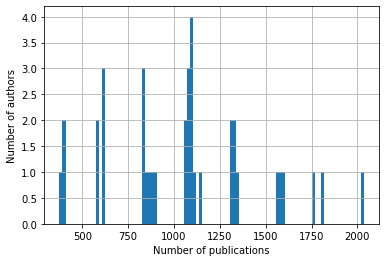

In [ ]:
#determine the productivity
# web_data.groupby(['author']).describe()
import matplotlib.pyplot as plt

plt.figure()
plt.hist(web_data['author'].value_counts(), bins=100)
plt.grid('both')
plt.xlabel("Number of publications")
plt.ylabel("Number of authors")


## Hitogram with publication waiting times
- Why? -> To derive holiday periods and the like

Text(0.5, 0, 'Days since last publication')

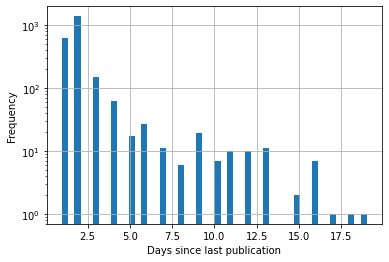

In [ ]:
# Remember that 0 means that it was the first entry
at_least_hours = 24
plt.figure()
web_data[web_data["time_since_pub"] > pd.Timedelta(hours=at_least_hours)]['time_since_pub'].astype('timedelta64[D]').plot.hist(bins=50, log=True, grid='both')
plt.xlabel('Days since last publication')

In [ ]:
###Productivity over time

#plot of the productivity of an employee over time
#select a handful of employees that represent the dataset
